#Import Libraries

**Question 2 :**

***To build, train and evaluate a deep neural network on the IMDB Review datasets using Tensorflow.keras.***

***With 5 Hiddenlayers using L2 regularisation ***

**HYPER PARAMETER TUNING :**

**1 Learning rate**

**2 Batch Size Change**


In [ ]:
import pandas as pd
from google.colab import drive
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_datasets as tfds
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


#Import Dataset

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/training.1600000.processed.noemoticon.csv', encoding = 'latin', header=None)

#Understanding Data

In [ ]:
data.shape

(1600000, 6)

In [ ]:
data = data.rename(columns={0: 'target', 1: 'id', 2: 'date', 3: 'query', 4: 'username', 5: 'content'})

***Plotted at least two samples from each class of the dataset (use matplotlib/seaborn/any other library).*** 

In [ ]:
data.head()

,target,id,date,query,username,content
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [ ]:
tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 5708992180492984784, name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 15703311680
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 113004173629718423
 physical_device_desc: "device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0"]

In [ ]:
data.drop(['id','date','query','username'], axis=1, inplace=True)

In [ ]:
data.groupby('target').head(2)

,target,content
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
800000,4,I LOVE @Health4UandPets u guys r the best!!
800001,4,im meeting up with one of my besties tonight! ...


#Data Visualization

***Plot a bar graph of class distribution in dataset. Each bar depicts the number of tweets belonging to a particular sentiment. (recommended -matplotlib/seaborn libraries)***

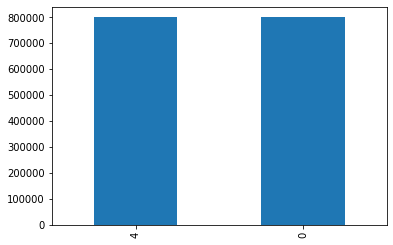

In [ ]:
data['target'].value_counts().plot(kind='bar')

#Splitting Train and Test Sets

In [ ]:
train, test = train_test_split(data, test_size=0.2, random_state=44)

In [ ]:
print('Train dataset shape: {}'.format(train.shape))
print('Test dataset shape: {}'.format(test.shape))

Train dataset shape: (1280000, 2)
Test dataset shape: (320000, 2)


In [ ]:
target=data.pop('target')

In [ ]:
full_dataset = tf.data.Dataset.from_tensor_slices((data.values, target.values))

In [ ]:
for feat, targ in full_dataset.take(5):
  print ('Features: {}, Target: {}'.format(feat, targ))

Features: [b"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D"], Target: 0
Features: [b"is upset that he can't update his Facebook by texting it... and might cry as a result  School today also. Blah!"], Target: 0
Features: [b'@Kenichan I dived many times for the ball. Managed to save 50%  The rest go out of bounds'], Target: 0
Features: [b'my whole body feels itchy and like its on fire '], Target: 0
Features: [b"@nationwideclass no, it's not behaving at all. i'm mad. why am i here? because I can't see you all over there. "], Target: 0


In [ ]:
# train_size = int(0.7 * len(data))
# val_size = int(0.15 * len(data))
# test_size = int(0.15 * len(data))

# #full_dataset = full_dataset.shuffle(buffer_size=10000)
# train_dataset = full_dataset.take(train_size)
# test_dataset = full_dataset.skip(train_size)
# val_dataset = test_dataset.skip(test_size)
# test_dataset = test_dataset.take(test_size)

In [ ]:
train_data, validation_data, test_data = tfds.load(
    name="imdb_reviews", 
    split=('train[:60%]', 'train[60%:]', 'test'),
    as_supervised=True)

In [ ]:
# train_data = full_dataset.shuffle(train_size).batch(10000)
# train_data = train_data.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

In [ ]:
# test_data = test_dataset.shuffle(test_size).batch(10000)
# test_data = test_data.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

In [ ]:
# val_data = val_dataset.shuffle(val_size).batch(10000)
# val_data = val_data.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

In [ ]:
# #dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
# train_data = full_dataset.shuffle(len(data)).batch(1)
# train_data = train_data.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

#Data Pre-Processing

***Changing the train and test data in the required format.***

In [ ]:
train_examples_batch, train_labels_batch = next(iter(train_data.batch(512)))

***We  are using a pre-trained text embedding model from TensorFlow Hub called google/nnlm-en-dim50/2.**

**Creating a Keras layer that uses a TensorFlow Hub model to embed the sentences,***

In [ ]:
embedding = "https://tfhub.dev/google/nnlm-en-dim128/2"
hub_layer = hub.KerasLayer(embedding, input_shape=[], 
                           dtype=tf.string, trainable=True)
hub_layer(train_examples_batch)

<tf.Tensor: shape=(512, 128), dtype=float32, numpy=
array([[ 9.01966274e-01, -4.83913347e-03,  1.17907055e-01, ...,
        -3.29729654e-02,  3.31326015e-02,  2.97882948e-02],
       [ 1.16170359e+00, -7.05558211e-02,  1.60849199e-01, ...,
        -8.43404531e-02, -5.93071952e-02,  6.59306049e-02],
       [ 7.89935350e-01, -1.92666233e-01,  8.59462842e-02, ...,
        -1.84138656e-01, -1.51076904e-02, -6.30587935e-02],
       ...,
       [ 1.44466436e+00, -8.83053914e-02,  1.60304487e-01, ...,
        -2.42272437e-01,  2.09675387e-01,  1.44283520e-02],
       [ 2.43924761e+00,  1.60155728e-01,  1.55203631e-02, ...,
        -5.26408434e-01,  1.19971232e-02,  1.57669261e-01],
       [ 9.46398973e-01, -2.19665486e-02,  2.32148677e-01, ...,
         1.18891115e-03,  1.45378023e-01,  3.60802338e-02]], dtype=float32)>

#Model Building
***Added drop out to adjust over fitting of the model***
***Choosen 5 Hidden layers and we can see by summary that accuracy is improving at the pass of each layer***

In [ ]:
model = tf.keras.Sequential()
model.add(hub_layer)
model.add(tf.keras.layers.Dense(5, kernel_regularizer=tf.keras.regularizers.l2(l2=0.01), activation='relu'))
model.add(tf.keras.layers.Dense(5, kernel_regularizer=tf.keras.regularizers.l2(l2=0.01), activation='relu'))
model.add(tf.keras.layers.Dropout(0.3)),
model.add(tf.keras.layers.Dense(5, kernel_regularizer=tf.keras.regularizers.l2(l2=0.01), activation='relu'))
model.add(tf.keras.layers.Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_1 (KerasLayer)   (None, 128)               124642688 
_________________________________________________________________
dense_4 (Dense)              (None, 5)                 645       
_________________________________________________________________
dense_5 (Dense)              (None, 5)                 30        
_________________________________________________________________
dropout_1 (Dropout)          (None, 5)                 0         
_________________________________________________________________
dense_6 (Dense)              (None, 5)                 30        
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 6         
Total params: 124,643,399
Trainable params: 124,643,399
Non-trainable params: 0
________________________________________

#Model Compilation

***RMS is an optimizer that utilizes the magnitude of recent gradients to normalize the gradients. Default learning rate is 0.001***

In [ ]:
model.compile(optimizer='rmsprop',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

#Total Training Time 

***Created function to calculate total Training time***

In [ ]:
from datetime import datetime

class timecallback(tf.keras.callbacks.Callback):
    def __init__(self):
        self.times = []
        self.epochs = []
        # use this value as reference to calculate cummulative time taken
        self.timetaken = tf.timestamp() 
    def on_epoch_end(self,epoch,logs = {}):
        self.times.append(tf.timestamp() - self.timetaken)
        self.epochs.append(epoch)
    def on_train_end(self,logs = {}):
        plt.xlabel('Epoch')
        plt.ylabel('Total time taken until an epoch in seconds')
        plt.plot(self.epochs, self.times, 'ro')
        for i in range(len(self.epochs)):
          j = self.times[i].numpy()
          if i == 0:
            plt.text(i, j, str(round(j, 3)))
          else:
            j_prev = self.times[i-1].numpy()
            plt.text(i, j, str(round(j-j_prev, 3)))
        plt.savefig(datetime.now().strftime("%Y%m%d%H%M%S") + ".png")

#Model Training
***Calculated Total time of training and plotted total time taken at each epoch***


Epoch 1/7
30/30 [==============================] - 4s 81ms/step - loss: 0.8666 - accuracy: 0.5267 - val_loss: 0.8142 - val_accuracy: 0.6401
Epoch 2/7
30/30 [==============================] - 3s 77ms/step - loss: 0.7926 - accuracy: 0.6692 - val_loss: 0.7544 - val_accuracy: 0.6870
Epoch 3/7
30/30 [==============================] - 3s 77ms/step - loss: 0.7299 - accuracy: 0.7547 - val_loss: 0.6991 - val_accuracy: 0.7697
Epoch 4/7
30/30 [==============================] - 3s 79ms/step - loss: 0.6709 - accuracy: 0.8183 - val_loss: 0.6561 - val_accuracy: 0.8282
Epoch 5/7
30/30 [==============================] - 3s 77ms/step - loss: 0.6193 - accuracy: 0.8612 - val_loss: 0.6213 - val_accuracy: 0.8278
Epoch 6/7
30/30 [==============================] - 3s 77ms/step - loss: 0.5789 - accuracy: 0.8888 - val_loss: 0.5976 - val_accuracy: 0.8598
Epoch 7/7
30/30 [==============================] - 3s 78ms/step - loss: 0.5373 - accuracy: 0.9142 - val_loss: 0.5848 - val_accuracy: 0.8333


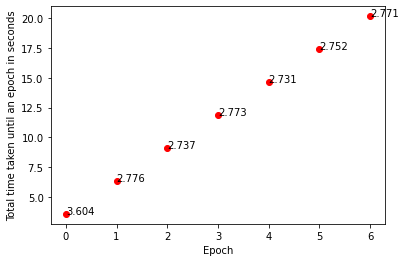

In [ ]:
start_time = tf.timestamp()
history = model.fit(train_data.shuffle(10000).batch(512),
                    epochs=7,
                    validation_data=validation_data.batch(512),
                    verbose=1,
                    callbacks = [timecallback()])
end_time = tf.timestamp()

total_time=end_time-start_time

***Total Time Taken to train the model 20.24***

In [ ]:
print('Time Taken is : ',total_time)

Time Taken is :  tf.Tensor(20.244046926498413, shape=(), dtype=float64)


#Model Evaluation
***Plotted Loss over Epocs for both Training and Validation data***

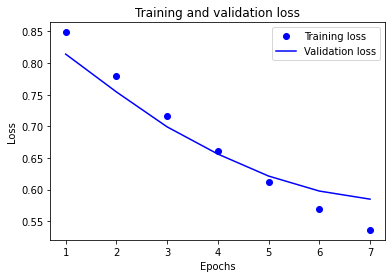

***Plotted Accuracy over Epochs for both Training and Validation data***

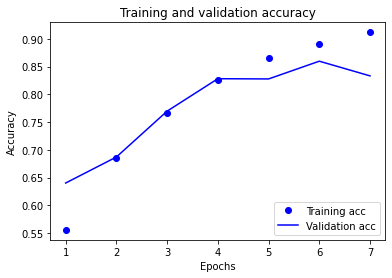

In [ ]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.show()

In [ ]:
x, y_ = next(iter(validation_data.batch(512)))

In [ ]:
y = (model.predict(x) > 0.5).astype("int32")

***Confusion Matrix***

In [ ]:
con = tf.math.confusion_matrix(labels=y_, predictions=y )
print(con)

tf.Tensor(
[[252   7]
 [ 66 187]], shape=(2, 2), dtype=int32)


***Classification Report***

In [ ]:
print(classification_report(y_.numpy(), y))


              precision    recall  f1-score   support

           0       0.79      0.97      0.87       259
           1       0.96      0.74      0.84       253

    accuracy                           0.86       512
   macro avg       0.88      0.86      0.86       512
weighted avg       0.88      0.86      0.86       512



***Accuracy calculation***

In [ ]:
results = model.evaluate(test_data.batch(512), verbose=2)

for name, value in zip(model.metrics_names, results):
  print("%s: %.3f" % (name, value))

49/49 - 2s - loss: 0.5956 - accuracy: 0.8098
loss: 0.596
accuracy: 0.810


In [ ]:
results

[0.5955924391746521, 0.8097599744796753]

In [ ]:
diff = y-y_
print('False positives: ', np.where(diff == -1)[0])
print('False negatives: ', np.where(diff == 1)[0])

False positives:  [  6   6   6 ... 511 511 511]
False negatives:  [  0   0   0 ... 510 510 510]


In [ ]:
#train_examples_batch, train_labels_batch = next(iter(train_data.batch(512)))

# HyperParameter Tuning
***Created Model 2 with changed learning rate***

In [ ]:
embedding = "https://tfhub.dev/google/nnlm-en-dim128/2"
hub_layer = hub.KerasLayer(embedding, input_shape=[], 
                           dtype=tf.string, trainable=True)
hub_layer(train_examples_batch)

<tf.Tensor: shape=(512, 128), dtype=float32, numpy=
array([[ 9.01966274e-01, -4.83913347e-03,  1.17907055e-01, ...,
        -3.29729654e-02,  3.31326015e-02,  2.97882948e-02],
       [ 1.16170359e+00, -7.05558211e-02,  1.60849199e-01, ...,
        -8.43404531e-02, -5.93071952e-02,  6.59306049e-02],
       [ 7.89935350e-01, -1.92666233e-01,  8.59462842e-02, ...,
        -1.84138656e-01, -1.51076904e-02, -6.30587935e-02],
       ...,
       [ 1.44466436e+00, -8.83053914e-02,  1.60304487e-01, ...,
        -2.42272437e-01,  2.09675387e-01,  1.44283520e-02],
       [ 2.43924761e+00,  1.60155728e-01,  1.55203631e-02, ...,
        -5.26408434e-01,  1.19971232e-02,  1.57669261e-01],
       [ 9.46398973e-01, -2.19665486e-02,  2.32148677e-01, ...,
         1.18891115e-03,  1.45378023e-01,  3.60802338e-02]], dtype=float32)>

In [ ]:
model2 = tf.keras.Sequential()
model2.add(hub_layer)
model2.add(tf.keras.layers.Dense(5, kernel_regularizer=tf.keras.regularizers.l2(l2=0.01), activation='relu'))
model2.add(tf.keras.layers.Dense(5, kernel_regularizer=tf.keras.regularizers.l2(l2=0.01), activation='relu'))
model2.add(tf.keras.layers.Dropout(0.3)),
model2.add(tf.keras.layers.Dense(5, kernel_regularizer=tf.keras.regularizers.l2(l2=0.01), activation='relu'))
model2.add(tf.keras.layers.Dense(1,activation='sigmoid'))

model2.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_4 (KerasLayer)   (None, 128)               124642688 
_________________________________________________________________
dense_16 (Dense)             (None, 5)                 645       
_________________________________________________________________
dense_17 (Dense)             (None, 5)                 30        
_________________________________________________________________
dropout_4 (Dropout)          (None, 5)                 0         
_________________________________________________________________
dense_18 (Dense)             (None, 5)                 30        
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 6         
Total params: 124,643,399
Trainable params: 124,643,399
Non-trainable params: 0
________________________________________

#Changing Optimizer 
***Optimizer changed to Adam and tuned learning rate to 0.3***

In [ ]:
optimizer_adam = tf.keras.optimizers.Adam(learning_rate=0.3)

model2.compile(optimizer= 'adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

***Calculated Total time of training and plotted total time taken at each of 7 epoch***

Epoch 1/7
30/30 [==============================] - 4s 103ms/step - loss: 0.8840 - accuracy: 0.5542 - val_loss: 0.8183 - val_accuracy: 0.7235
Epoch 2/7
30/30 [==============================] - 3s 99ms/step - loss: 0.7957 - accuracy: 0.6588 - val_loss: 0.7236 - val_accuracy: 0.8351
Epoch 3/7
30/30 [==============================] - 3s 97ms/step - loss: 0.7141 - accuracy: 0.7282 - val_loss: 0.6343 - val_accuracy: 0.8573
Epoch 4/7
30/30 [==============================] - 3s 98ms/step - loss: 0.6271 - accuracy: 0.7740 - val_loss: 0.5582 - val_accuracy: 0.8659
Epoch 5/7
30/30 [==============================] - 3s 99ms/step - loss: 0.5534 - accuracy: 0.7958 - val_loss: 0.5057 - val_accuracy: 0.8706
Epoch 6/7
30/30 [==============================] - 3s 100ms/step - loss: 0.4808 - accuracy: 0.8105 - val_loss: 0.4772 - val_accuracy: 0.8743
Epoch 7/7
30/30 [==============================] - 3s 98ms/step - loss: 0.4247 - accuracy: 0.8297 - val_loss: 0.4561 - val_accuracy: 0.8775


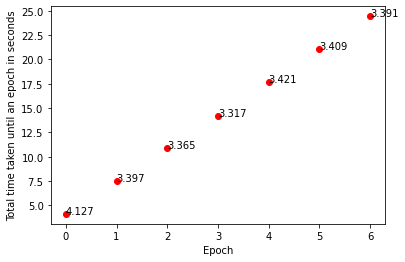

In [ ]:
start_time = tf.timestamp()
history = model2.fit(train_data.shuffle(10000).batch(512),
                    epochs=7,
                    validation_data=validation_data.batch(512),
                    verbose=1,
                    callbacks = [timecallback()])
end_time = tf.timestamp()

total_time=end_time-start_time

***Plotted Loss over Epochs for both Training and Validation data***

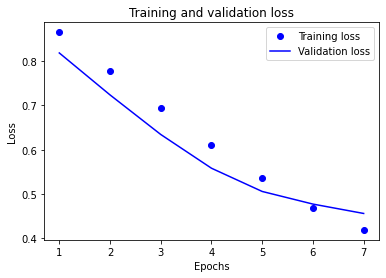

In [ ]:
history_dict = history.history
history_dict.keys()
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

#Model Evaluation
***Plotted Accuracy over Epochs for both Training and Validation data***

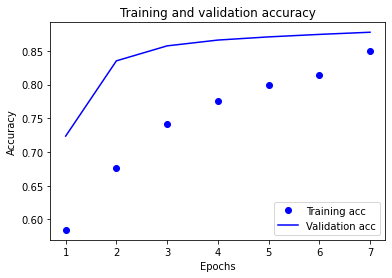

In [ ]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.show()

In [ ]:
x, y_ = next(iter(validation_data.batch(512)))

In [ ]:
y2 = (model2.predict(x) > 0.5).astype("int32")

***Confusion Matrix***

In [ ]:
con = tf.math.confusion_matrix(labels=y_, predictions=y2 )
print(con)

tf.Tensor(
[[235  24]
 [ 30 223]], shape=(2, 2), dtype=int32)


***Classification Report***

In [ ]:
print(classification_report(y_.numpy(), y2))

              precision    recall  f1-score   support

           0       0.89      0.91      0.90       259
           1       0.90      0.88      0.89       253

    accuracy                           0.89       512
   macro avg       0.89      0.89      0.89       512
weighted avg       0.89      0.89      0.89       512



#HyperParameter Tuning 

***Created Model 3 with Tuned Batch size***

In [ ]:
embedding = "https://tfhub.dev/google/nnlm-en-dim128/2"
hub_layer = hub.KerasLayer(embedding, input_shape=[], 
                           dtype=tf.string, trainable=True)
hub_layer(train_examples_batch)

<tf.Tensor: shape=(512, 128), dtype=float32, numpy=
array([[ 9.01966274e-01, -4.83913347e-03,  1.17907055e-01, ...,
        -3.29729654e-02,  3.31326015e-02,  2.97882948e-02],
       [ 1.16170359e+00, -7.05558211e-02,  1.60849199e-01, ...,
        -8.43404531e-02, -5.93071952e-02,  6.59306049e-02],
       [ 7.89935350e-01, -1.92666233e-01,  8.59462842e-02, ...,
        -1.84138656e-01, -1.51076904e-02, -6.30587935e-02],
       ...,
       [ 1.44466436e+00, -8.83053914e-02,  1.60304487e-01, ...,
        -2.42272437e-01,  2.09675387e-01,  1.44283520e-02],
       [ 2.43924761e+00,  1.60155728e-01,  1.55203631e-02, ...,
        -5.26408434e-01,  1.19971232e-02,  1.57669261e-01],
       [ 9.46398973e-01, -2.19665486e-02,  2.32148677e-01, ...,
         1.18891115e-03,  1.45378023e-01,  3.60802338e-02]], dtype=float32)>

In [ ]:
model3 = tf.keras.Sequential()
model3.add(hub_layer)
model3.add(tf.keras.layers.Dense(5, kernel_regularizer=tf.keras.regularizers.l2(l2=0.01), activation='relu'))
model3.add(tf.keras.layers.Dense(5, kernel_regularizer=tf.keras.regularizers.l2(l2=0.01), activation='relu'))
model3.add(tf.keras.layers.Dropout(0.3)),
model3.add(tf.keras.layers.Dense(5, kernel_regularizer=tf.keras.regularizers.l2(l2=0.01), activation='relu'))
model3.add(tf.keras.layers.Dense(1,activation='sigmoid'))

model3.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_6 (KerasLayer)   (None, 128)               124642688 
_________________________________________________________________
dense_20 (Dense)             (None, 5)                 645       
_________________________________________________________________
dense_21 (Dense)             (None, 5)                 30        
_________________________________________________________________
dropout_5 (Dropout)          (None, 5)                 0         
_________________________________________________________________
dense_22 (Dense)             (None, 5)                 30        
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 6         
Total params: 124,643,399
Trainable params: 124,643,399
Non-trainable params: 0
________________________________________

In [ ]:
model3.compile(optimizer= 'rmsprop',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

#Updated Batch Size and trained the model again

Epoch 1/7


15/15 [==============================] - 4s 163ms/step - loss: 0.8683 - accuracy: 0.5363 - val_loss: 0.8166 - val_accuracy: 0.6312
Epoch 2/7
15/15 [==============================] - 3s 153ms/step - loss: 0.7983 - accuracy: 0.6600 - val_loss: 0.7729 - val_accuracy: 0.7468
Epoch 3/7
15/15 [==============================] - 3s 153ms/step - loss: 0.7472 - accuracy: 0.7531 - val_loss: 0.7330 - val_accuracy: 0.7471
Epoch 4/7
15/15 [==============================] - 3s 154ms/step - loss: 0.6999 - accuracy: 0.8056 - val_loss: 0.6998 - val_accuracy: 0.7929
Epoch 5/7
15/15 [==============================] - 3s 153ms/step - loss: 0.6646 - accuracy: 0.8455 - val_loss: 0.6749 - val_accuracy: 0.8412
Epoch 6/7
15/15 [==============================] - 3s 151ms/step - loss: 0.6329 - accuracy: 0.8773 - val_loss: 0.6535 - val_accuracy: 0.7918
Epoch 7/7
15/15 [==============================] - 3s 152ms/step - loss: 0.5962 - accuracy: 0.8947 - val_loss: 0.6439 - val_accuracy: 0.7842


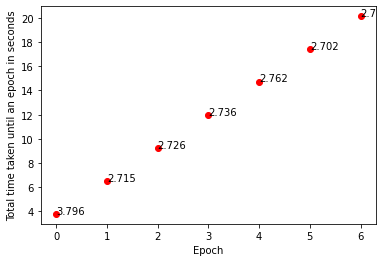

In [ ]:
start_time = tf.timestamp()
history = model3.fit(train_data.shuffle(10000).batch(1024),
                    epochs=7,
                    validation_data=validation_data.batch(1024),
                    verbose=1,
                    callbacks = [timecallback()])
end_time = tf.timestamp()

total_time=end_time-start_time

***Plotted Loss over Epocs for both Training and Validation data***

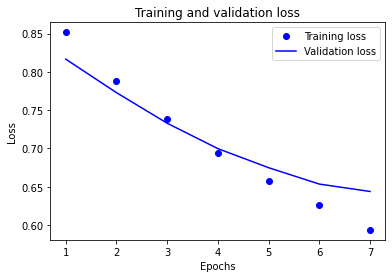

In [ ]:
history_dict = history.history
history_dict.keys()
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

#Model Evaluation

***Plotted Accuracy over Epocs for both Training and Validation data***

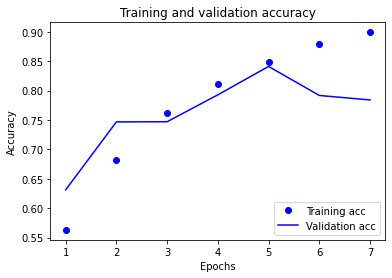

In [ ]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.show()

In [ ]:
x, y_ = next(iter(validation_data.batch(1024)))

In [ ]:
y3 = (model3.predict(x) > 0.5).astype("int32")

***Confusion Matrix***

In [ ]:
con = tf.math.confusion_matrix(labels=y_, predictions=y3 )
print(con)

tf.Tensor(
[[517  12]
 [199 296]], shape=(2, 2), dtype=int32)


***Classification Report***

In [ ]:
print(classification_report(y_.numpy(), y3))

              precision    recall  f1-score   support

           0       0.72      0.98      0.83       529
           1       0.96      0.60      0.74       495

    accuracy                           0.79      1024
   macro avg       0.84      0.79      0.78      1024
weighted avg       0.84      0.79      0.79      1024



**Model01 With default learning rate of 0.001 on the RMS Optimizer total learning time is 20 sec and Accuracy is 81%**

**With HyperParameter Tuning we created 3 models by changing Optimizers, Learning Rate and Batch Size.**

**Model02 - When Batch size is same and learning rate chaged to 0.2 total training time decreased to 25 sec and Acuuracy chaged to 89%**

**Model03 - When batch size was doubled total training time decreased to 20 sec with learning rate of 0.001 and accuracy to 79%**